In [1]:
import tushare as ts
import pandas as pd
from datetime import datetime 
pro = ts.pro_api()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

balance_kv={
    "money_cap":"货币资金",
    "trad_asset":"交易性金融资产",
    "oth_cur_assets":"其他流动资产",
    "total_cur_assets":"流动资产合计",
    "st_borr":"短期借款",
    "adv_receipts":"预收款项",
    "total_cur_liab":"流动负债合计",
    "total_liab":"负债合计"
}

def getbalance_yearly(ts_code='002624.sz',priod=5):
    df_all=pd.DataFrame()
    for i in range(0,priod+1):
        year=datetime.now().year-i
        key='Y'+str(year)
        df = pro.balancesheet(ts_code='002624.sz',fields=",".join(balance_kv.keys()),period=str(year)+'1231')
        
        if(df.empty):
            continue
            
        df = df.stack()
        df=pd.DataFrame(df[0])
        df['v']=df[0]
        df.columns=["key",key]
        df['key']=df.index
        df['key']=df.apply(lambda x:balance_kv[x.key] if x.key in balance_kv else x.key ,axis = 1)
        df[key]=df.apply(lambda x:str(round(int(x[key])/100000000,2))+"亿" if isinstance(x[key],float) else x[key],axis = 1)
    
        if df_all.empty:
            df_all=df
        else:
            df_all['Y'+str(year)]=df['Y'+str(year)]
        
    return df_all

df=getbalance_yearly(ts_code='002624.sz',priod=6)

def markblod(x):
    blod_key=[]     
    return 'color : red;font-weight:700' if x in blod_key else ''

df=df.style.applymap(markblod).set_caption('<h3>完美世界(002624.sz)-资产负债表</h3>').hide()
df

key,Y2020,Y2019,Y2018,Y2017,Y2016
货币资金,29.43亿,25.26亿,42.29亿,32.36亿,20.97亿
交易性金融资产,17.53亿,22.49亿,nan,nan,nan
其他流动资产,3.46亿,5.17亿,15.38亿,27.54亿,60.5亿
流动资产合计,78.85亿,101.32亿,107.83亿,102.46亿,112.08亿
短期借款,7.84亿,11.39亿,12.7亿,6.18亿,4.41亿
预收款项,0.24亿,6.06亿,4.09亿,5.29亿,1.63亿
流动负债合计,42.04亿,48.0亿,39.21亿,52.15亿,42.23亿
负债合计,43.25亿,65.01亿,66.69亿,77.98亿,78.45亿


In [3]:
import tushare as ts
pro = ts.pro_api()
df = pro.index_weight(index_code='000300.SH', start_date='20150101', end_date='20220410')
df.drop_duplicates(subset=['con_code'],keep='first',inplace=True)
df

,index_code,con_code,trade_date,weight
0,000300.SH,603195.SH,20220401,0.0529
1,000300.SH,003816.SZ,20220401,0.1679
2,000300.SH,300782.SZ,20220401,0.2574
3,000300.SH,601138.SH,20220401,0.2100
4,000300.SH,600989.SH,20220401,0.1719
5,000300.SH,601698.SH,20220401,0.0263
6,000300.SH,300750.SZ,20220401,3.7680
7,000300.SH,601916.SH,20220401,0.1475
8,000300.SH,002938.SZ,20220401,0.1036
9,000300.SH,601319.SH,20220401,0.0684


In [7]:
from xlib.mysql import mysql
db="tushare"
df_cal=mysql.selectToDf("select cal_date as trade_date from astock_trade_cal where is_open=1",db)
df_cal

,trade_date
0,19901219
1,19901220
2,19901221
3,19901224
4,19901225
...,...
7823,20221226
7824,20221227
7825,20221228
7826,20221229


In [6]:
from xlib.astock import AStock
df_price=AStock.getStockDailyPriceByCode(ts_code='002624.sz',db='tushare')
df_price

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,adj_factor,vwap,prev_close,returns,volume
0,002624.SZ,20111028,7.002864,8.145084,6.999682,7.979637,3.563474,4.416163,123.9300,190533.54,439425.0721,1,23.062871,1.133781,123.9300,190533.54
1,002624.SZ,20111031,7.632835,8.049634,7.413299,7.760102,7.979637,-0.219535,-2.7500,140907.98,341852.7653,1,24.260708,2.538860,-2.7500,140907.98
2,002624.SZ,20111101,7.505568,8.393255,7.461024,8.017817,7.760102,0.257716,3.3200,131812.13,328987.9499,1,24.958851,2.469011,3.3200,131812.13
3,002624.SZ,20111102,7.715558,8.186446,7.616927,8.164174,8.017817,0.146357,1.8300,90191.79,224479.8817,1,24.889167,2.551008,1.8300,90191.79
4,002624.SZ,20111103,8.272351,8.367801,7.741012,7.753738,8.164174,-0.410436,-5.0300,98454.70,246697.7593,1,25.056979,2.597574,-5.0300,98454.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,002624.SZ,20220406,13.300000,13.990000,13.140000,13.260000,13.330000,-0.070000,-0.5251,414287.96,554315.4000,3.143,13.379954,13.330000,-0.5251,414287.96
2150,002624.SZ,20220407,13.140000,13.660000,12.880000,12.890000,13.260000,-0.370000,-2.7903,374608.76,495415.6580,3.143,13.224881,13.260000,-2.7903,374608.76
2151,002624.SZ,20220408,12.890000,12.930000,12.300000,12.530000,12.890000,-0.360000,-2.7929,330175.22,413399.4460,3.143,12.520607,12.890000,-2.7929,330175.22
2152,002624.SZ,20220411,12.390000,12.830000,12.050000,12.370000,12.530000,-0.160000,-1.2769,345547.72,426715.9960,3.143,12.348974,12.530000,-1.2769,345547.72


In [ ]:
import tushare as ts
import pandas as pd
from xlib.mysql import mysql
from xlib.astock import AStock
def fcompute(ts_code,df_cal):
    df_price=AStock.getStockDailyPriceByCode(ts_code,db)
    df_price=pd.merge(df_cal,df_price,on=['trade_date'],how='outer', validate="one_to_many")
    df_balance=mysql.selectToDf("select ann_date as trade_date,money_cap,trad_asset,oth_cur_assets,total_cur_assets,st_borr,adv_receipts,total_cur_liab,total_liab from astock_finance_balancesheet where ts_code='"+ts_code+"' and report_type=1 order by trade_date asc",db)
    df_basic=mysql.selectToDf("select trade_date,total_mv from astock_price_daily_basic where ts_code='"+ts_code+"' order by trade_date asc",db)
    df=pd.merge(df_price, df_balance, how='left', on='trade_date', copy=True, indicator=False)
    df=pd.merge(df, df_basic, how='left', on='trade_date', copy=True, indicator=False)
    df=df.fillna(method='ffill')
    df['ts_code']=ts_code
    df=df[df.trade_date>'20150101']
    df=df[df.trade_date<'20220410']
    df=df.reset_index(drop=True)
    
    df['f1']=(df['money_cap']+df['trad_asset'])/df['st_borr']
    df['f2']=(df['money_cap']+df['trad_asset']-df['st_borr']-df['adv_receipts'])/df['total_mv'].astype('float')
    df['f3']=(df['money_cap']+df['trad_asset']-df['st_borr']-df['adv_receipts'])/df['total_cur_liab']
    
    df=pd.DataFrame(df,columns =['trade_date','ts_code','high','low','open','close','volume','volume','amount','f1','f2','f3'])
    df.rename(columns={'ts_code':'symbol','trade_date':'date'}, inplace = True)
    df['label']=df['close'].shift(-10)/df['close']
    df['date']=df['date'].map(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:8])
    return df

db="tushare"
df_cal=mysql.selectToDf("select cal_date as trade_date from astock_trade_cal where is_open=1",db)
df=fcompute(ts_code="002624.sz",df_cal=df_cal)

df

In [4]:
import pandas as pd
import tushare as ts
from xlib.mysql import mysql
from xlib.astock import AStock
from pandarallel import pandarallel

def fcompute(ts_code,df_cal):
    df_price=AStock.getStockDailyPriceByCode(ts_code,db)
    df_price=pd.merge(df_cal,df_price,on=['trade_date'],how='outer', validate="one_to_many")
    df_balance=mysql.selectToDf("select ann_date as trade_date,money_cap,trad_asset,oth_cur_assets,total_cur_assets,st_borr,adv_receipts,total_cur_liab,total_liab from astock_finance_balancesheet where ts_code='"+ts_code+"' and report_type=1 order by trade_date asc",db)
    df_basic=mysql.selectToDf("select trade_date,total_mv from astock_price_daily_basic where ts_code='"+ts_code+"' order by trade_date asc",db)
    df=pd.merge(df_price, df_balance, how='left', on='trade_date', copy=True, indicator=False)
    df=pd.merge(df, df_basic, how='left', on='trade_date', copy=True, indicator=False)
    df=df.fillna(method='ffill')
    df['ts_code']=ts_code
    df['label']=df['close'].shift(-10)/df['close']
    df=df[df.trade_date>'20150101']
    df=df[df.trade_date<'20220410']
    df=df.reset_index(drop=True)
    df['f1']=(df['money_cap']+df['trad_asset'])/df['st_borr']
    df['f2']=(df['money_cap']+df['trad_asset']-df['st_borr']-df['adv_receipts'])/df['total_mv'].astype('float')
    df['f3']=(df['money_cap']+df['trad_asset']-df['st_borr']-df['adv_receipts'])/df['total_cur_liab']
    
    df=pd.DataFrame(df,columns =['trade_date','ts_code','high','low','open','close','volume','volume','amount','f1','f2','f3'])
    df.rename(columns={'ts_code':'symbol','trade_date':'date'}, inplace = True)
    df['label']=df['close'].shift(-10)/df['close']
    df['date']=df['date'].map(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:8])
    return df


db="tushare"
df_cal=mysql.selectToDf("select cal_date as trade_date from astock_trade_cal where is_open=1",db)


pro = ts.pro_api()
df_code = pro.index_weight(index_code='000300.SH', start_date='20150101', end_date='20220410')
df_code.drop_duplicates(subset=['con_code'],keep='first',inplace=True)
 
df_all=[]
df_code=df_code['con_code'].to_list()

for ts_code in df_code:
    df=fcompute(ts_code,df_cal)
    df_all.append(df)
    print(ts_code)
df_all=pd.concat(df_all)
df_all.to_csv("./xlib/cache/fin.csv")

603195.SH
003816.SZ
300782.SZ
601138.SH
600989.SH
601698.SH
300750.SZ
601916.SH
002938.SZ
601319.SH
603259.SH
601236.SH
300896.SZ
601865.SH
601066.SH
300759.SZ
300760.SZ
688111.SH
601990.SH
603486.SH
002916.SZ
603392.SH
600025.SH
603659.SH
603087.SH
300677.SZ
603882.SH
603260.SH
001979.SZ
300676.SZ
603233.SH
601155.SH
300628.SZ
601108.SH
300498.SZ
300595.SZ
300601.SZ
603501.SH
002841.SZ
603833.SH
603517.SH
601881.SH
300408.SZ
300413.SZ
300558.SZ
300450.SZ
603019.SH
603658.SH
002812.SZ
603939.SH
603338.SH
601966.SH
603799.SH
300433.SZ
002821.SZ
603160.SH
603986.SH
601985.SH
300529.SZ
002791.SZ
601021.SH
603369.SH
603899.SH
000333.SZ
601808.SH
601939.SH
002179.SZ
601169.SH
603806.SH
002714.SZ
002709.SZ
601238.SH
603288.SH
603993.SH
300347.SZ
300316.SZ
601231.SH
601360.SH
002157.SZ
601800.SH
601225.SH
601100.SH
300274.SZ
601669.SH
002624.SZ
002602.SZ
002607.SZ
002600.SZ
002601.SZ
002594.SZ
002568.SZ
601216.SH
002555.SZ
601799.SH
601933.SH
601211.SH
002736.SZ
000166.SZ
300144.SZ
600919.SH


Starting training...
[1]	valid_0's l2: 0.168679
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.117863
[3]	valid_0's l2: 0.0851618
[4]	valid_0's l2: 0.0816545
[5]	valid_0's l2: 0.0614321
[6]	valid_0's l2: 0.0482335
[7]	valid_0's l2: 0.0473966
[8]	valid_0's l2: 0.0469381
[9]	valid_0's l2: 0.046707
[10]	valid_0's l2: 0.046593
[11]	valid_0's l2: 0.0385221
[12]	valid_0's l2: 0.0332378
[13]	valid_0's l2: 0.0297336
[14]	valid_0's l2: 0.0274077
[15]	valid_0's l2: 0.0258103
[16]	valid_0's l2: 0.0247703
[17]	valid_0's l2: 0.0240541
[18]	valid_0's l2: 0.0240462
[19]	valid_0's l2: 0.0240407
[20]	valid_0's l2: 0.0235649
[21]	valid_0's l2: 0.0232376
[22]	valid_0's l2: 0.0232361
[23]	valid_0's l2: 0.0230108
[24]	valid_0's l2: 0.0230108
[25]	valid_0's l2: 0.0228937
[26]	valid_0's l2: 0.0228921
[27]	valid_0's l2: 0.0227812
[28]	valid_0's l2: 0.0226638
[29]	valid_0's l2: 0.0226638
[30]	valid_0's l2: 0.0226638
[31]	valid_0's l2: 0.0226638
[32]	valid_0's l2: 0.0226168
[33]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-02  2018-01-02
End Period                 2022-04-08  2022-04-08
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          74.58%      -2.82%
CAGR﹪                     13.95%      -0.67%

Sharpe                     0.65        0.07
Smart Sharpe               0.64        0.07
Sortino                    0.99        0.11
Smart Sortino              0.97        0.1
Sortino/√2                 0.7         0.07
Smart Sortino/√2           0.69        0.07
Omega                      1.13        1.13

Max Drawdown               -26.41%     -48.95%
Longest DD Days            637         1190
Volatility (ann.)          25.78%      20.98%
R^2                        0.47        0.47
Calmar                     0.53        -0.01
Skew                       0.3         0.51
Kurtosis                   4.38        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-07-10,2022-03-15,2022-04-08,637,-26.413053,-24.536839
2,2018-05-17,2018-10-18,2019-02-13,272,-22.837516,-21.143773
3,2020-03-16,2020-05-25,2020-07-03,109,-17.202493,-16.891037
4,2020-01-21,2020-02-04,2020-03-13,52,-16.987853,-15.183231
5,2019-05-17,2019-08-13,2020-01-02,230,-14.053519,-13.822824


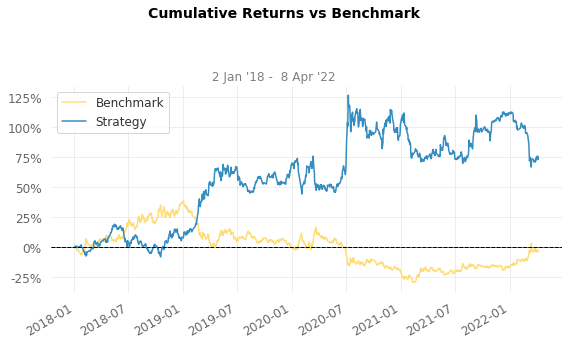

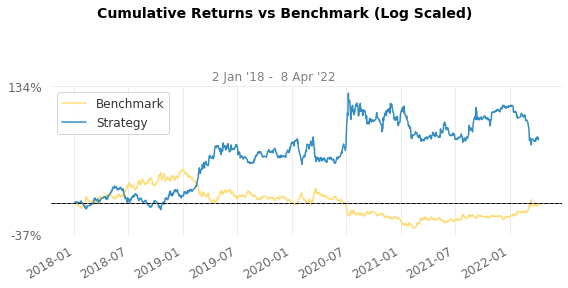

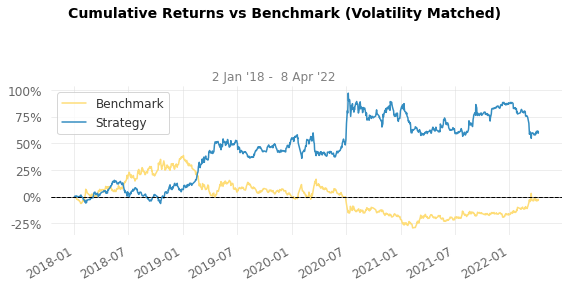

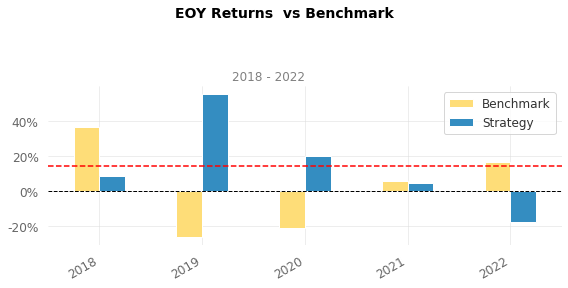

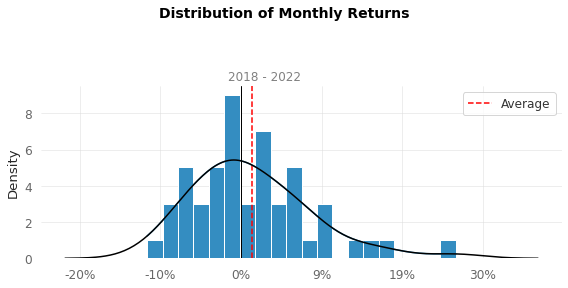

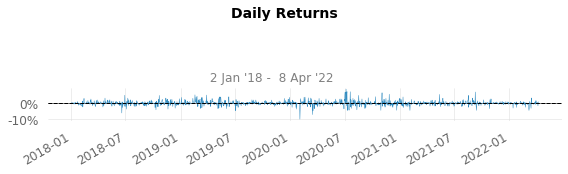

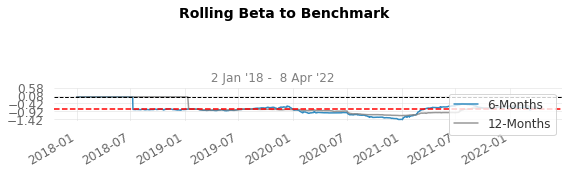

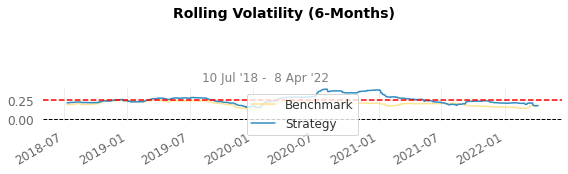

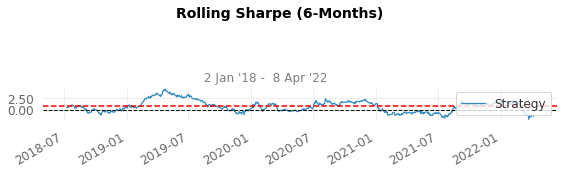

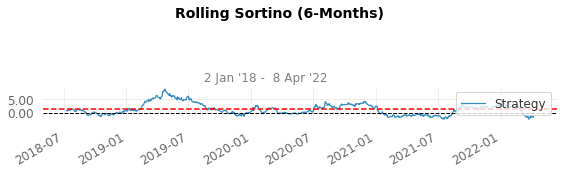

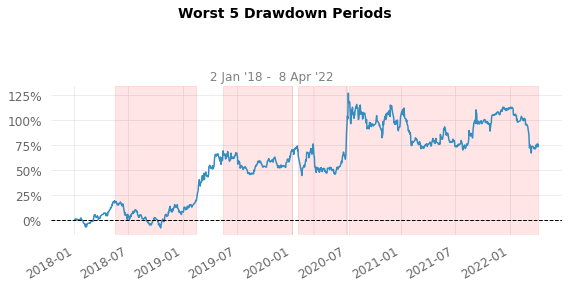

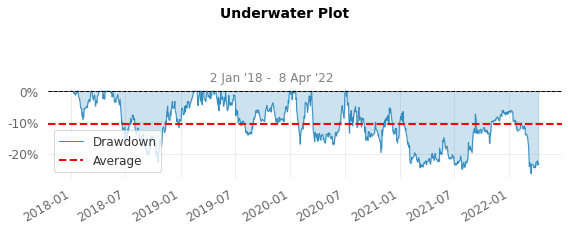

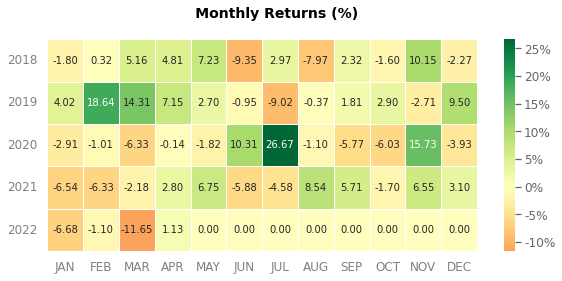

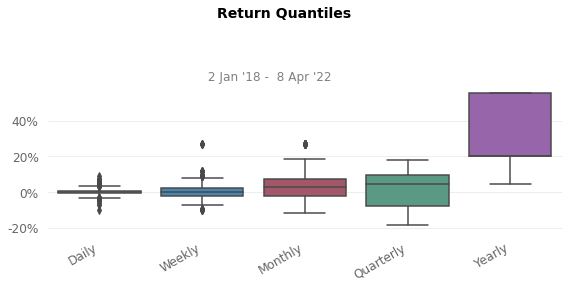

In [5]:
import pandas as pd
from xlib import data
import akshare as ak

idx_data = ak.index_zh_a_hist(symbol='000300', period="daily", start_date='20180101', end_date='20220410')    
idx_data.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                           '最高':'high', '最低':'low', '成交量':'volume',
                           '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                           '涨跌额':'chg_amount', '换手率':'turnover',
                          }, inplace = True)
idx_data['date'] = pd.to_datetime(idx_data['date'], format='%Y-%m-%d')
bench=idx_data.set_index('date')


df=pd.DataFrame()
df=pd.read_csv('./xlib/cache/fin.csv',index_col=0)
df=df.reset_index(drop=True)
df['label']=df['close'].shift(-30)/df['close']
from xlib import model
df_train,df_valid,df_pred=model.datasplit(df,train_end='2017-01-01',valid_end='2018-01-01')
model.lgbtrain(df_train,df_valid,label='label')  
preds=model.lgbpred(df_pred,label='label') 

from xlib.strategies import Top10Strategy
from xlib import backtest
preds['score']=preds.apply(lambda x: -9 if x['high']==x['low'] else x['pred'] ,axis=1)
preds['rank']=preds.groupby('date')['score'].rank(method='max',ascending=False)
preds['signal']=preds.apply(lambda x: 1 if x['rank']<=10 else 0 ,axis=1)

#print(preds[preds.signal==1])
returns=backtest.test(preds,Top10Strategy,hold_day=10)
backtest.analysis(returns,bench)

In [ ]:
returns=backtest.test(preds,Top10Strategy)
backtest.analysis(returns,bench)